<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

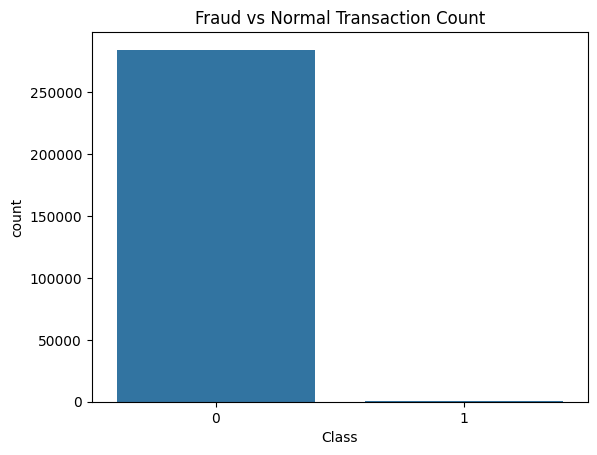

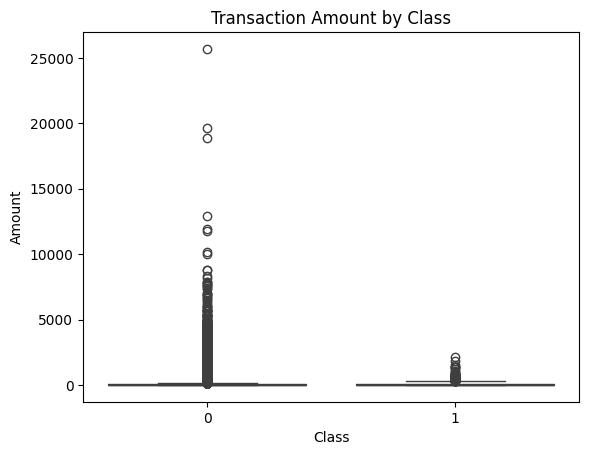

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Load Datadet
df = pd.read_csv('/content/creditcard.cvs.csv')
df.head()
df.describe()
df.info()
# Explore Datset
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nClass Distribution:\n", df['Class'].value_counts())
# Visualize class imbalance
sns.countplot(x='Class', data=df)
plt.title('Fraud vs Normal Transaction Count')
plt.show()
# Anomaly Detection using Isolation Forest
# Sample features
features = df.drop(columns=['Time', 'Class'])  # Drop 'Time' as it's not useful
labels = df['Class']

# Fit Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.001, random_state=42)
predictions = iso_forest.fit_predict(features)

# Convert predictions: -1 (anomaly), 1 (normal)
predicted_labels = [1 if x == -1 else 0 for x in predictions]
# Visualize anamolies
# Plot only 'Amount' and 'Class'
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount by Class')
plt.show()

